In [3]:
import cv2
import numpy as np

img = cv2.imread('images/1.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

cv2.imwrite('images/temp.jpg', res)

True

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/1.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
M = cv2.getRotationMatrix2D((cols/2,rows/2),120,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/s.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[503,491],[2160,833],[657,3601],[2800,3197]])
pts2 = np.float32([[0,0],[cols,0],[0,rows],[cols,rows]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('images/m2.jpg')
img2 = cv2.imread('images/m1.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

pts1 = np.float32([[582,562],[3482-200,548],[611,2400],[3500-200,2400]])
pts2 = np.float32([[0,0],[2886,0],[0,1821],[2886,1821]])

M1 = cv2.getPerspectiveTransform(pts1,pts2)
dst1= cv2.warpPerspective(img1,M1,(2922+200,1810))

M = np.float32([[1,0,490],[0,1,554]])
dst = cv2.warpAffine(dst1,M,(cols2,rows2))

res = cv2.add(img2,dst)

cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

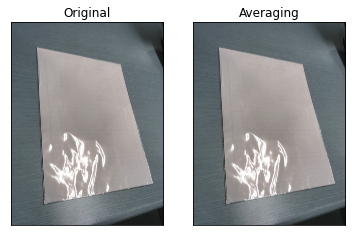

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/s.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

l=1
kernel = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  14, -11,  18, -14, -10,  10,  18,  -6, -15,  16,   0],
       [  0,   4,   1, -22,  18,   7,  12, -21,  12,  11,  10,   0],
       [  0,  -7,   9, -12,  12, -22,   7,   7,   6, -17,  -5,   0],
       [  0,  13,  -8,  15, -23,  17, -16,  -8,  -5,  15,  14,   0],
       [  0, -20,  18, -10,  14,   6,  14, -12,   8, -17,   4,   0],
       [  0,   3,  -1,  -5, -19,   9, -22,  10,  -4,  20, -22,   0],
       [  0,  14, -15,  12,   6,  -2,  16, -19,  26, -17,  -2,   0],
       [  0,   3,  -4,  -4,   5,   5, -15,   2, -22,   7,  -5,   0],
       [  0, -11,  18, -14,  16,  -5,  24, -26,  26,   2,  -8,   0],
       [  0, -10, -16,  -2,  -8,  12, -12,  13,  -3, -21,  12,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],np.float32)

img = cv2.imread('images/lena.png', 0)
h,w=img.shape
dst = np.zeros((h-2*l, w-2*l),np.uint8)

for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/fingerprint.jpg',0)
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

print(kernel)
cv2.imshow('img',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


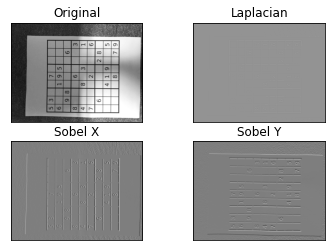

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

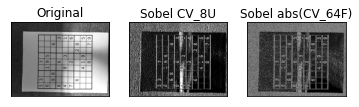

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

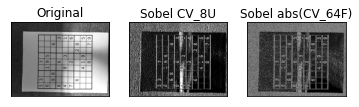

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0) # Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

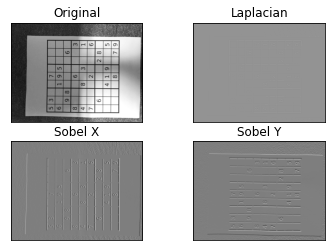

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

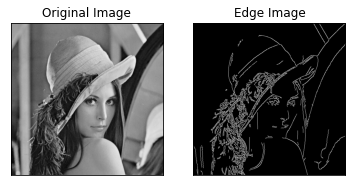

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


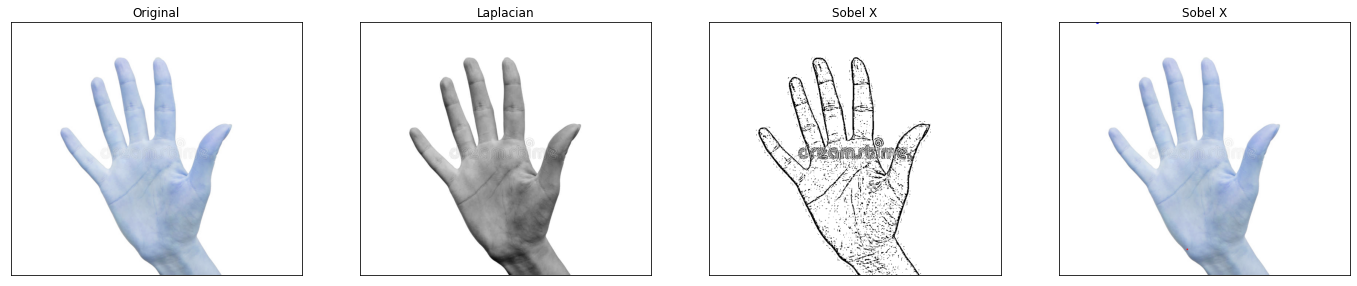

In [86]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = cv2.imread('images/hand.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)


print(M)

#cx = int(M['m30']/M['m00'])
#cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

plt.figure(figsize=(24,8))
plt.subplot(1,4,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(img0,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

#epsilon = 0.1*cv2.arcLength(cnt,True)
#approx = cv2.approxPolyDP(cnt,epsilon,True)

#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])
#img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)



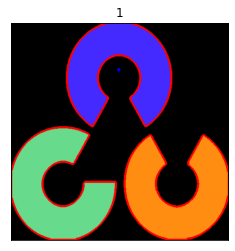

[[224   0]]
[[224   1]]
[[223   2]]
[[219   2]]
[[218   3]]
[[216   3]]
[[215   4]]
[[213   4]]
[[212   5]]
[[208   5]]
[[207   6]]
[[206   6]]
[[205   7]]
[[204   7]]
[[203   8]]
[[202   8]]
[[201   9]]
[[200   9]]
[[199  10]]
[[198  10]]
[[197  11]]
[[196  11]]
[[195  12]]
[[194  12]]
[[193  13]]
[[192  13]]
[[191  14]]
[[190  14]]
[[188  16]]
[[187  16]]
[[186  17]]
[[185  17]]
[[182  20]]
[[181  20]]
[[180  21]]
[[179  21]]
[[175  25]]
[[174  25]]
[[158  41]]
[[158  42]]
[[154  46]]
[[154  47]]
[[151  50]]
[[151  51]]
[[149  53]]
[[149  54]]
[[148  55]]
[[148  56]]
[[146  58]]
[[146  59]]
[[145  60]]
[[145  61]]
[[144  62]]
[[144  63]]
[[142  65]]
[[142  66]]
[[141  67]]
[[141  69]]
[[140  70]]
[[140  71]]
[[139  72]]
[[139  73]]
[[138  74]]
[[138  75]]
[[137  76]]
[[137  78]]
[[136  79]]
[[136  81]]
[[135  82]]
[[135  83]]
[[134  84]]
[[134  86]]
[[133  87]]
[[133  90]]
[[132  91]]
[[132  95]]
[[131  96]]
[[131  98]]
[[130  99]]
[[130 103]]
[[129 104]]
[[129 112]]
[[128 113]]
[[12

In [104]:
im = cv2.imread('images/opencv_logo.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
#plt.figure(figsize=(24,8))
#plt.subplot(1,3,1),plt.imshow(im)
#plt.title('Original'), plt.xticks([]), plt.yticks([])
#plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
#plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
#plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
#plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
#plt.show()

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img0 = cv2.drawContours(img0, contours, 1, (255,0,0), 3)
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)



cnt = contours[2]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

plt.subplot(1,1,1),plt.imshow(img0,cmap = 'gray')
plt.title('1'), plt.xticks([]), plt.yticks([])
plt.show()

for i in range(len(contours[2])):
    print(contours[2][i])
 
cnt = contours[0]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)
x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.minAreaRect(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)


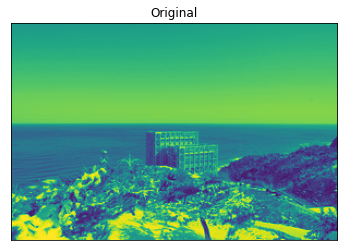

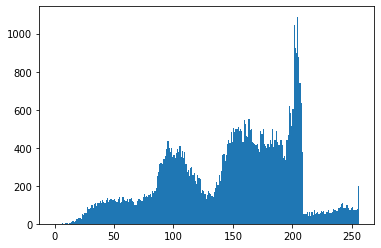

In [116]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/a.jpeg',0)
plt.subplot(111),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

plt.hist(img.ravel(),256,[0,256])
plt.show()

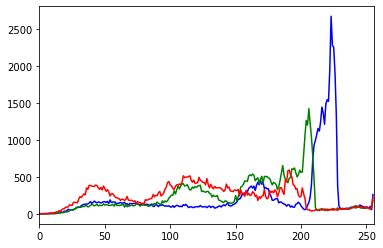

In [117]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/a.jpeg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

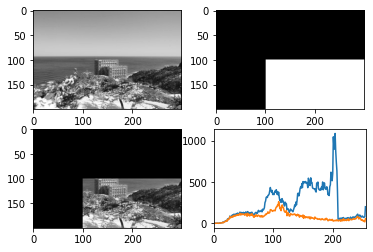

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/a.jpeg',0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

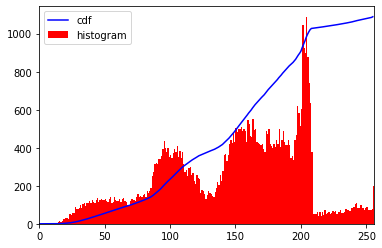

In [119]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/a.jpeg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [121]:
import numpy as np
import cv2

img = cv2.imread('images/a.jpeg',0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('images/temp/temp1.jpg',cl1)

True

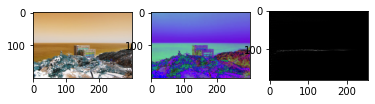

In [123]:
import cv2
import numpy as np

img = cv2.imread('images/a.jpeg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.subplot(131), plt.imshow(img, 'gray')
plt.subplot(132), plt.imshow(hsv, 'gray')
plt.subplot(133), plt.imshow(hist, 'gray')
plt.show()


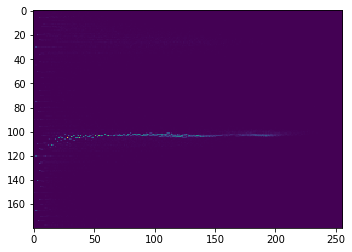

In [126]:
  
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/a.jpeg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()

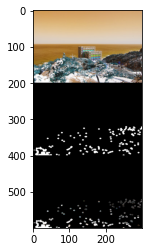

In [135]:
import cv2
import numpy as np

roi = cv2.imread('images/j.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread('images/a.jpeg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))

plt.subplot(111), plt.imshow(res, 'gray')
plt.show()

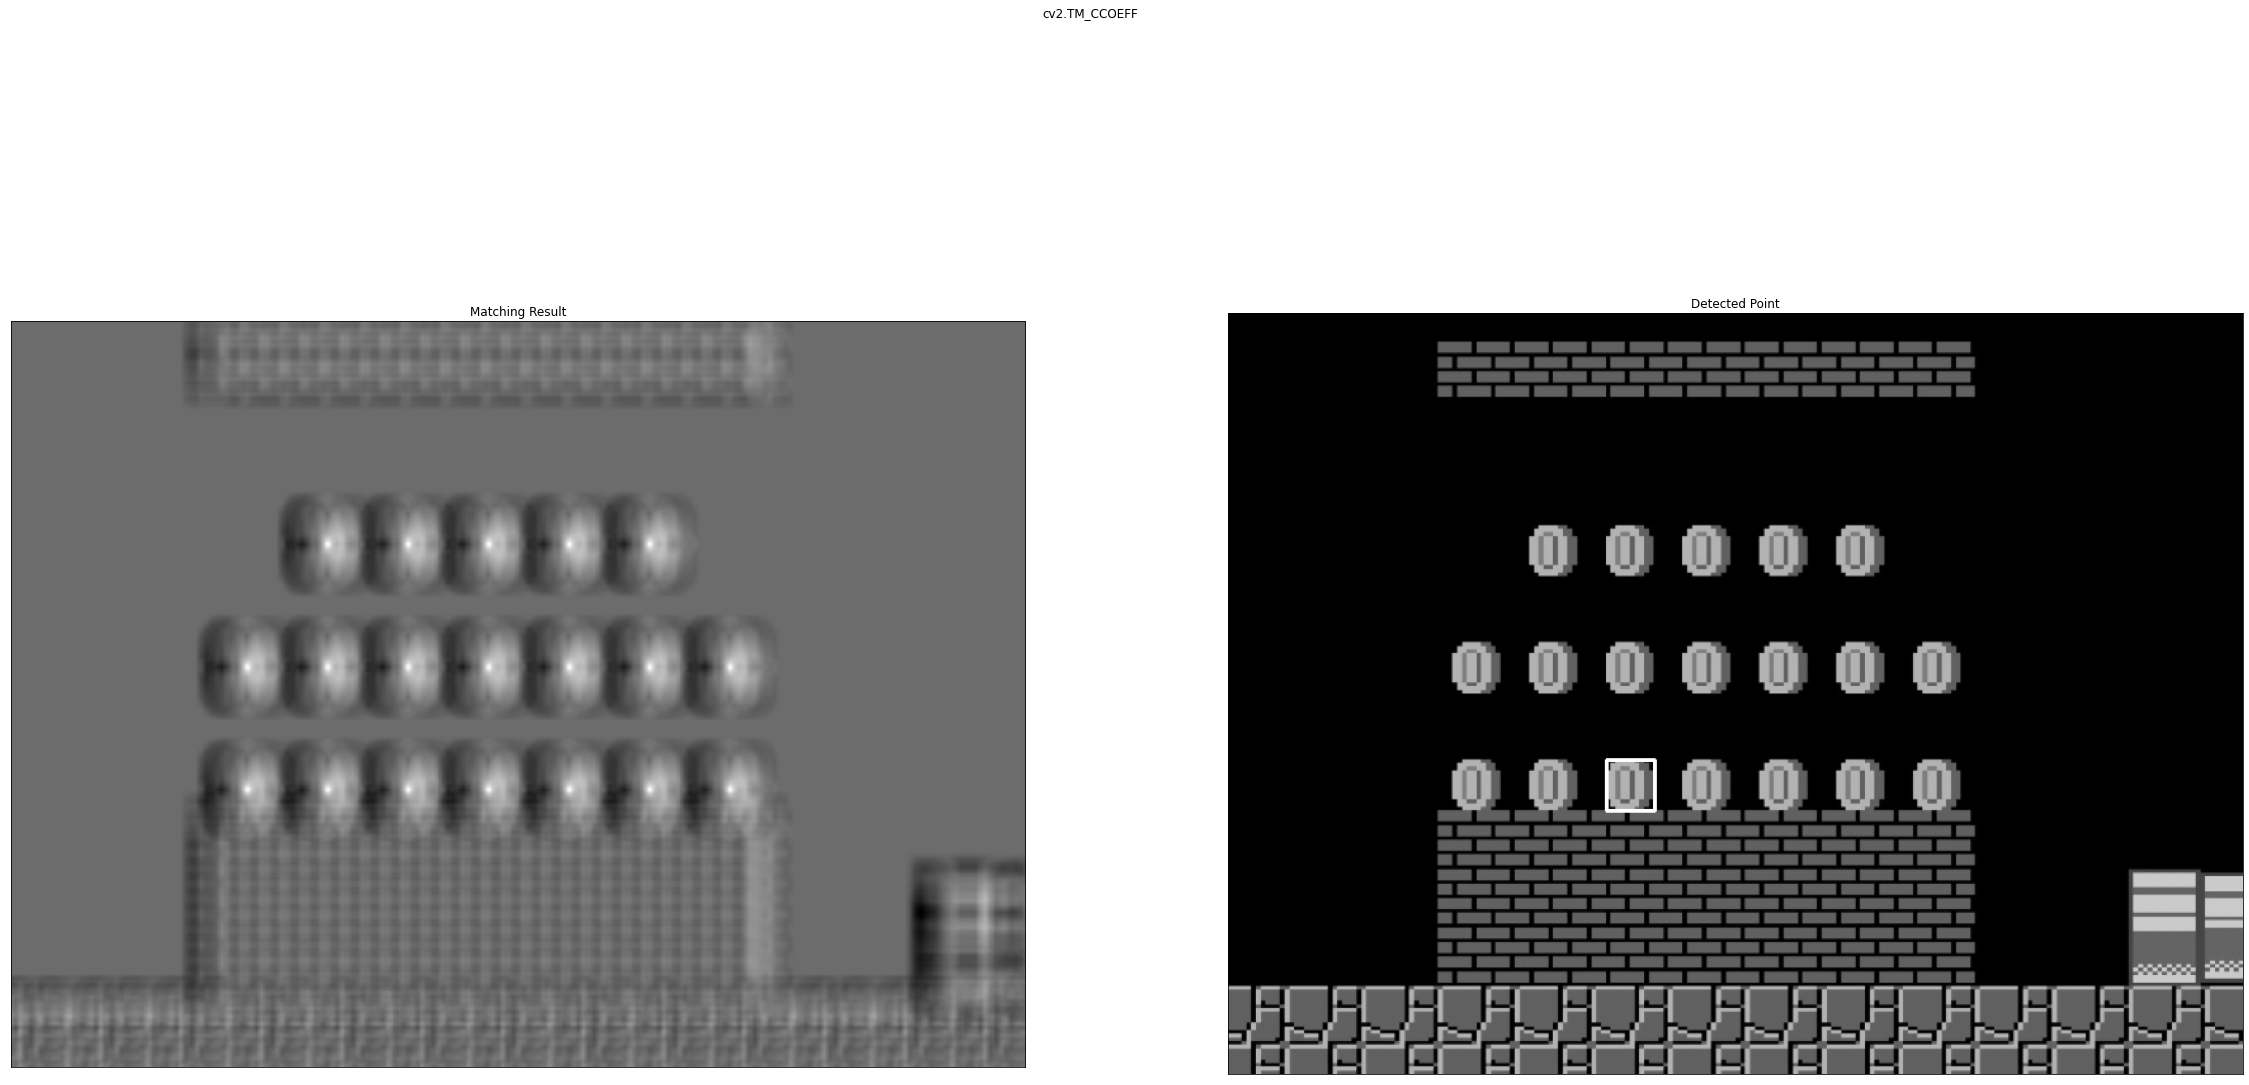

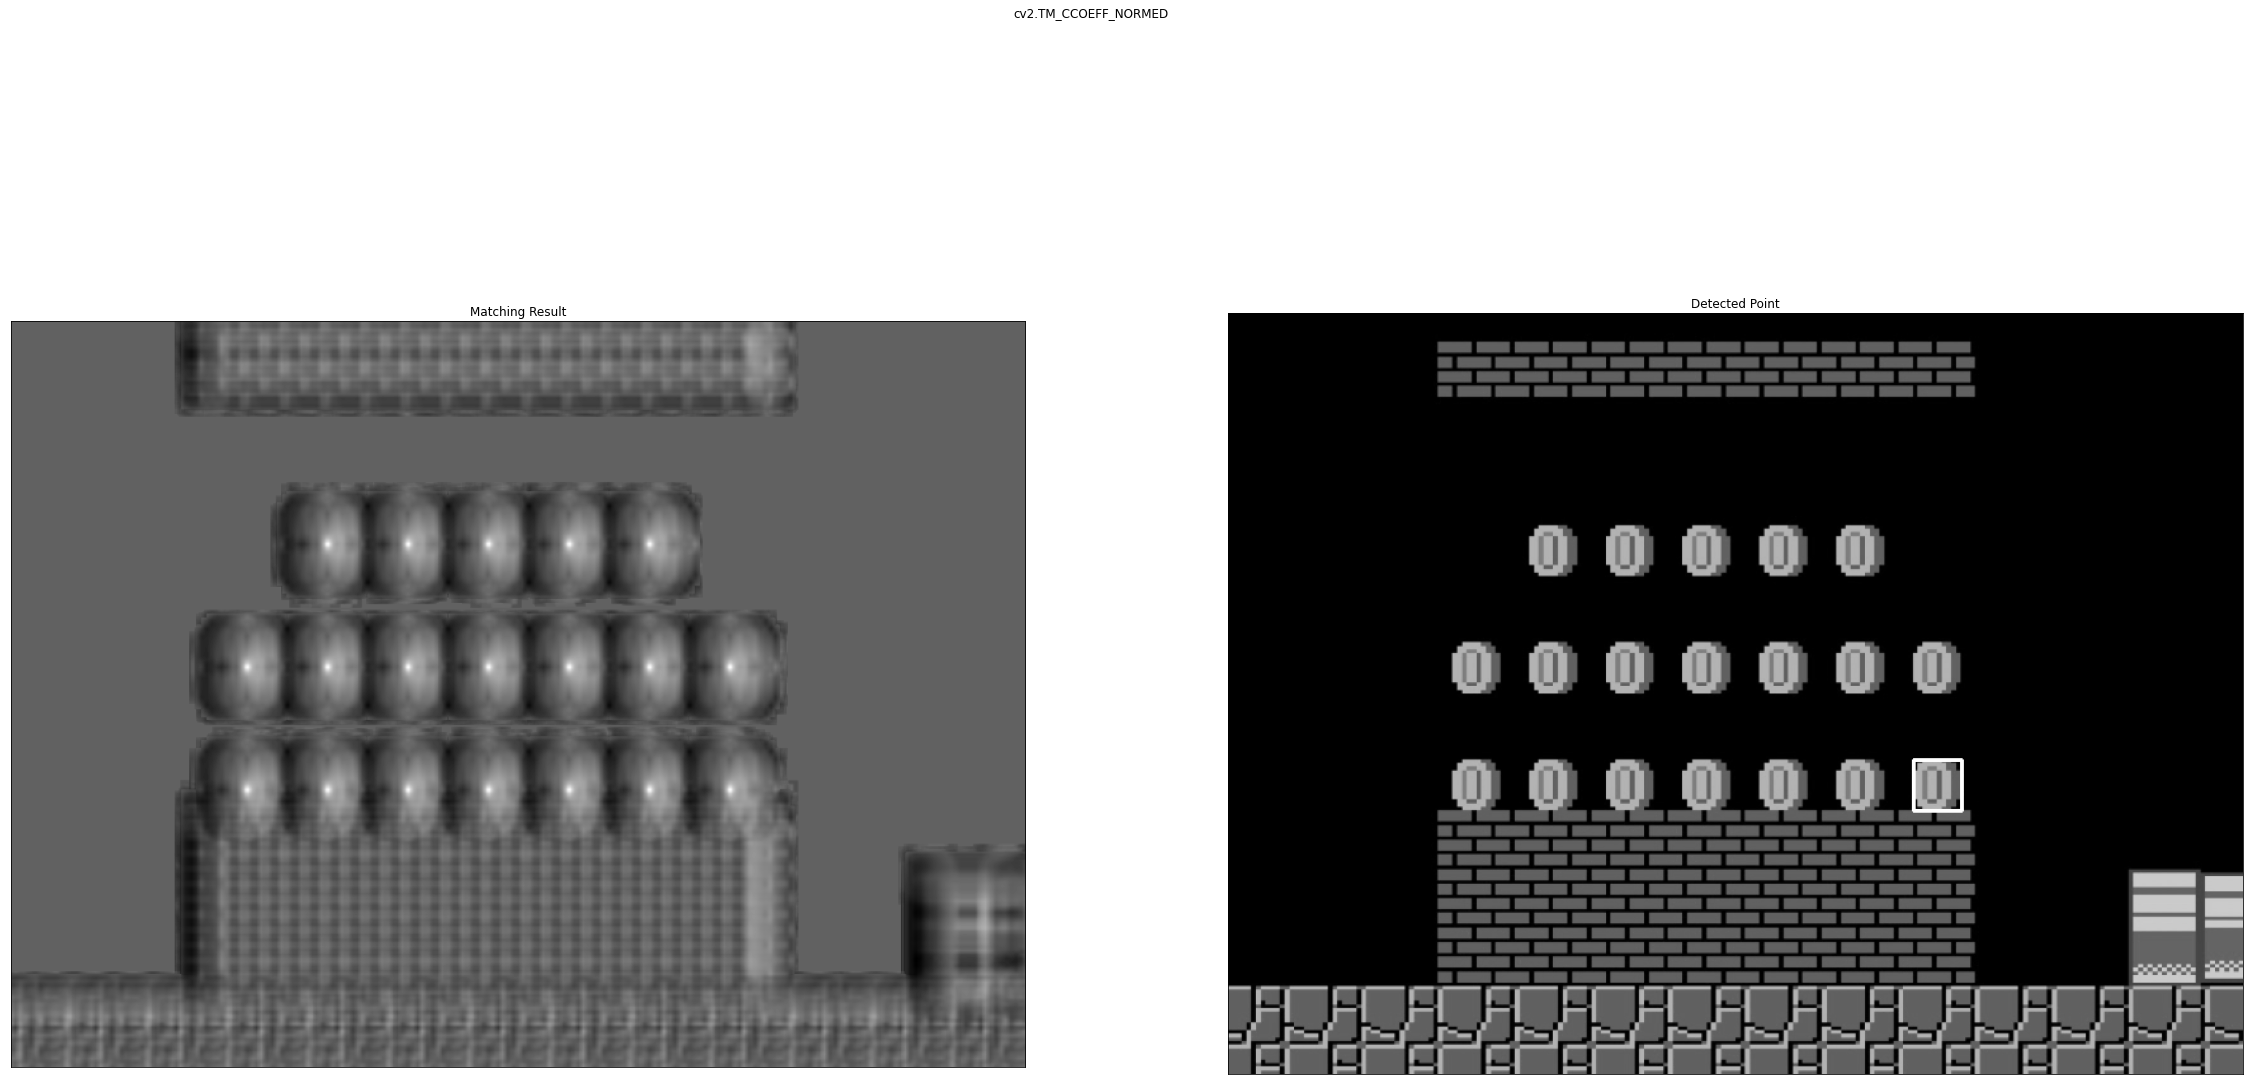

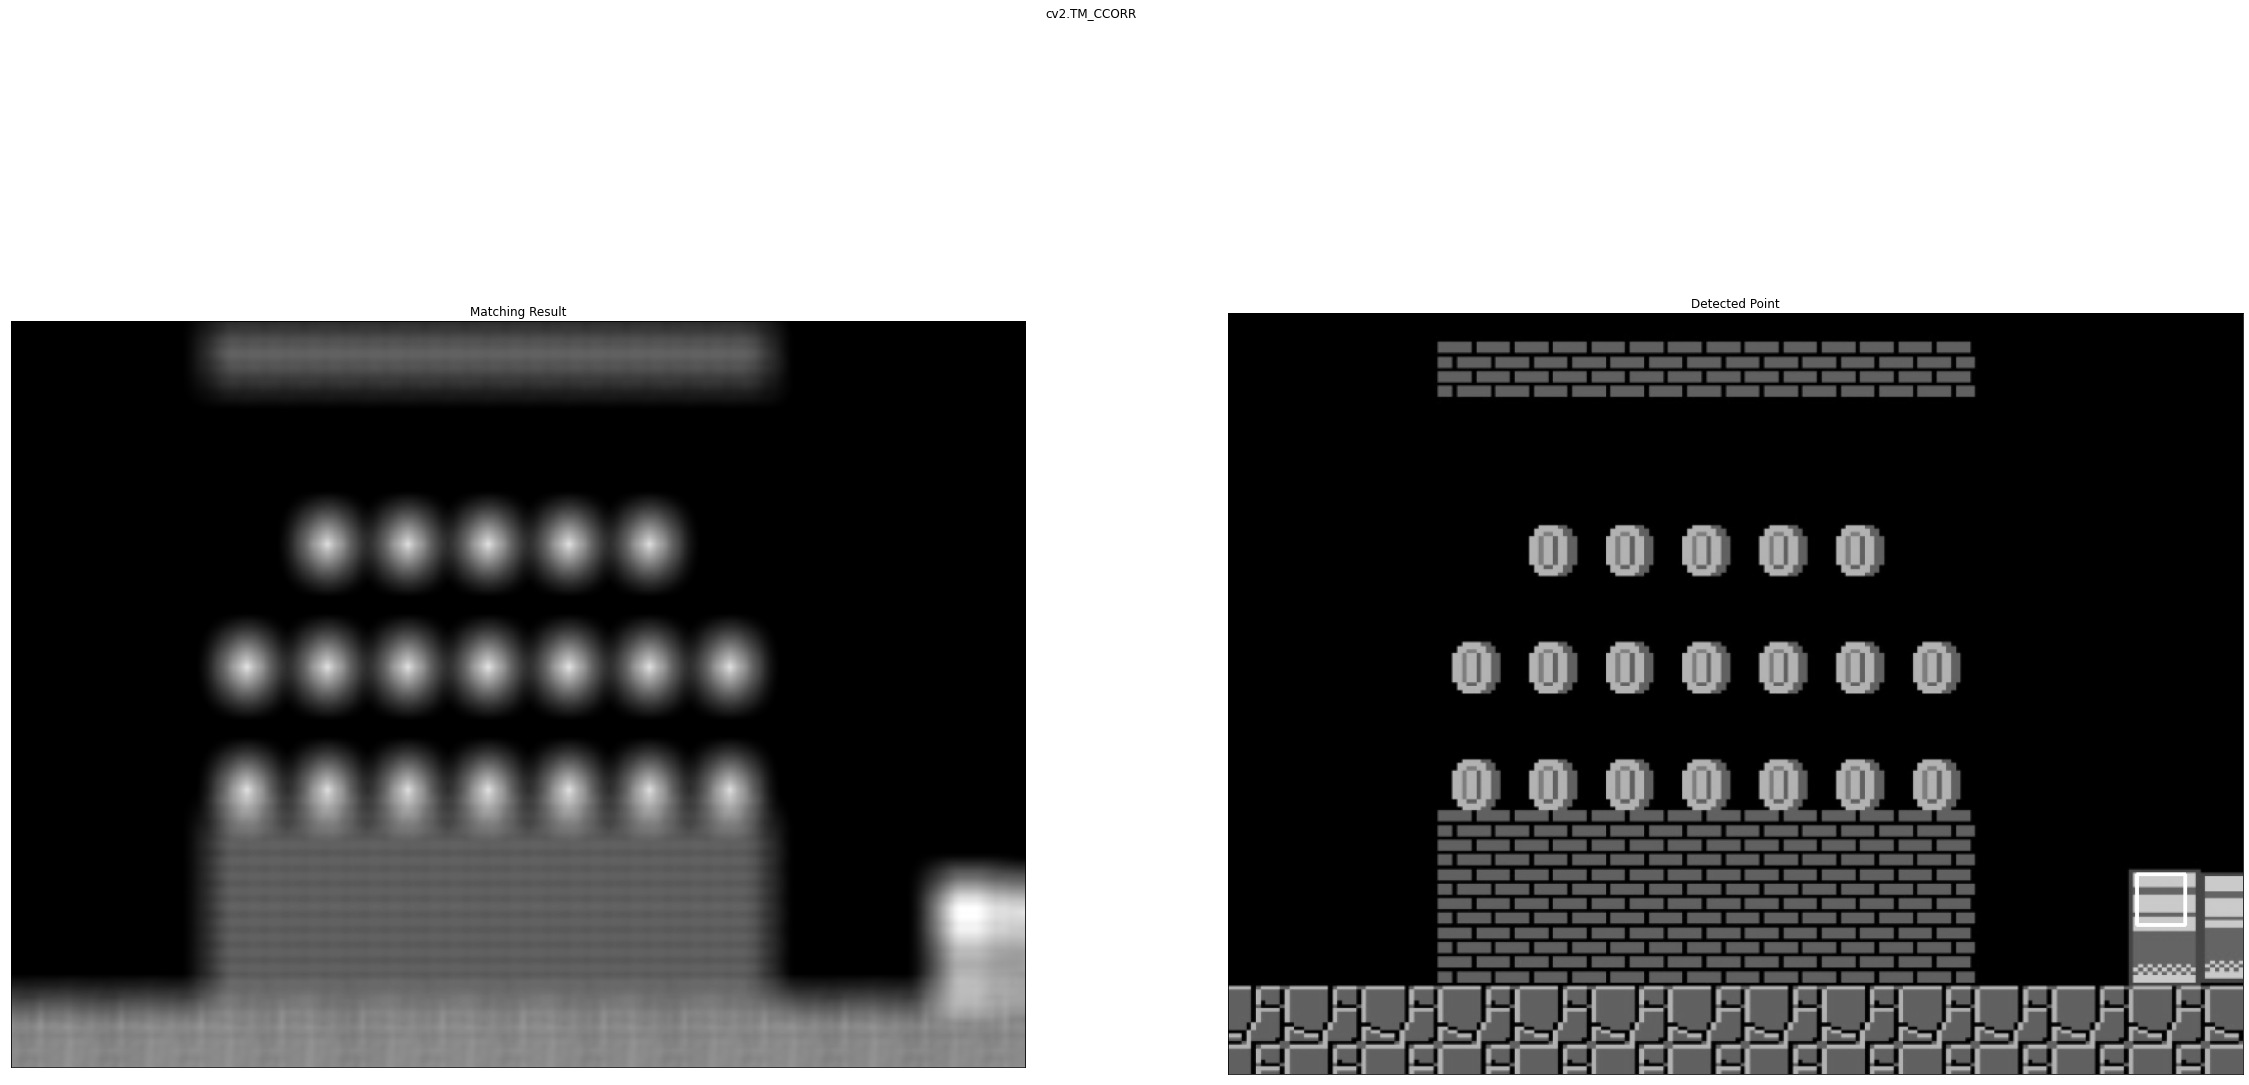

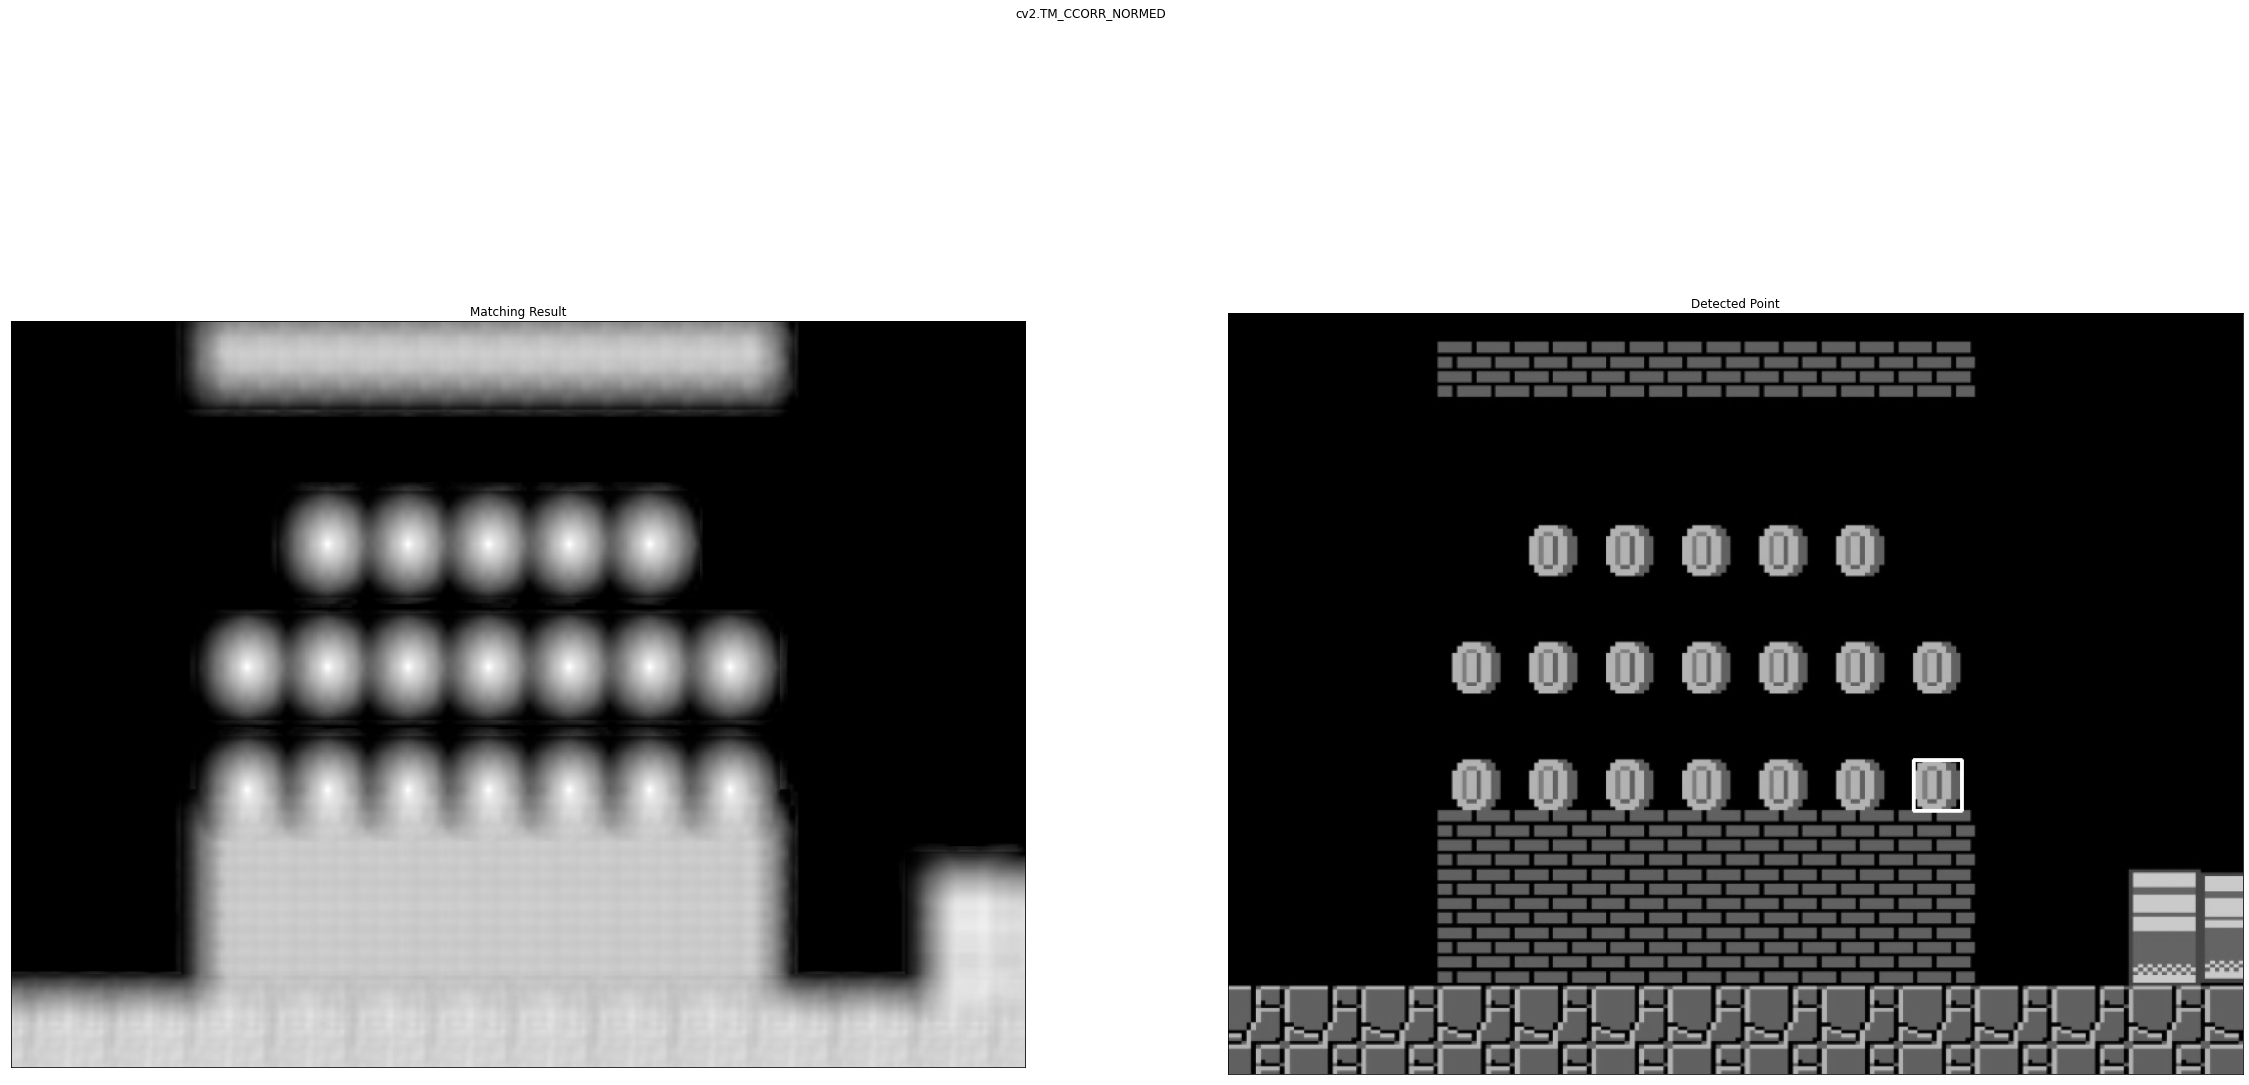

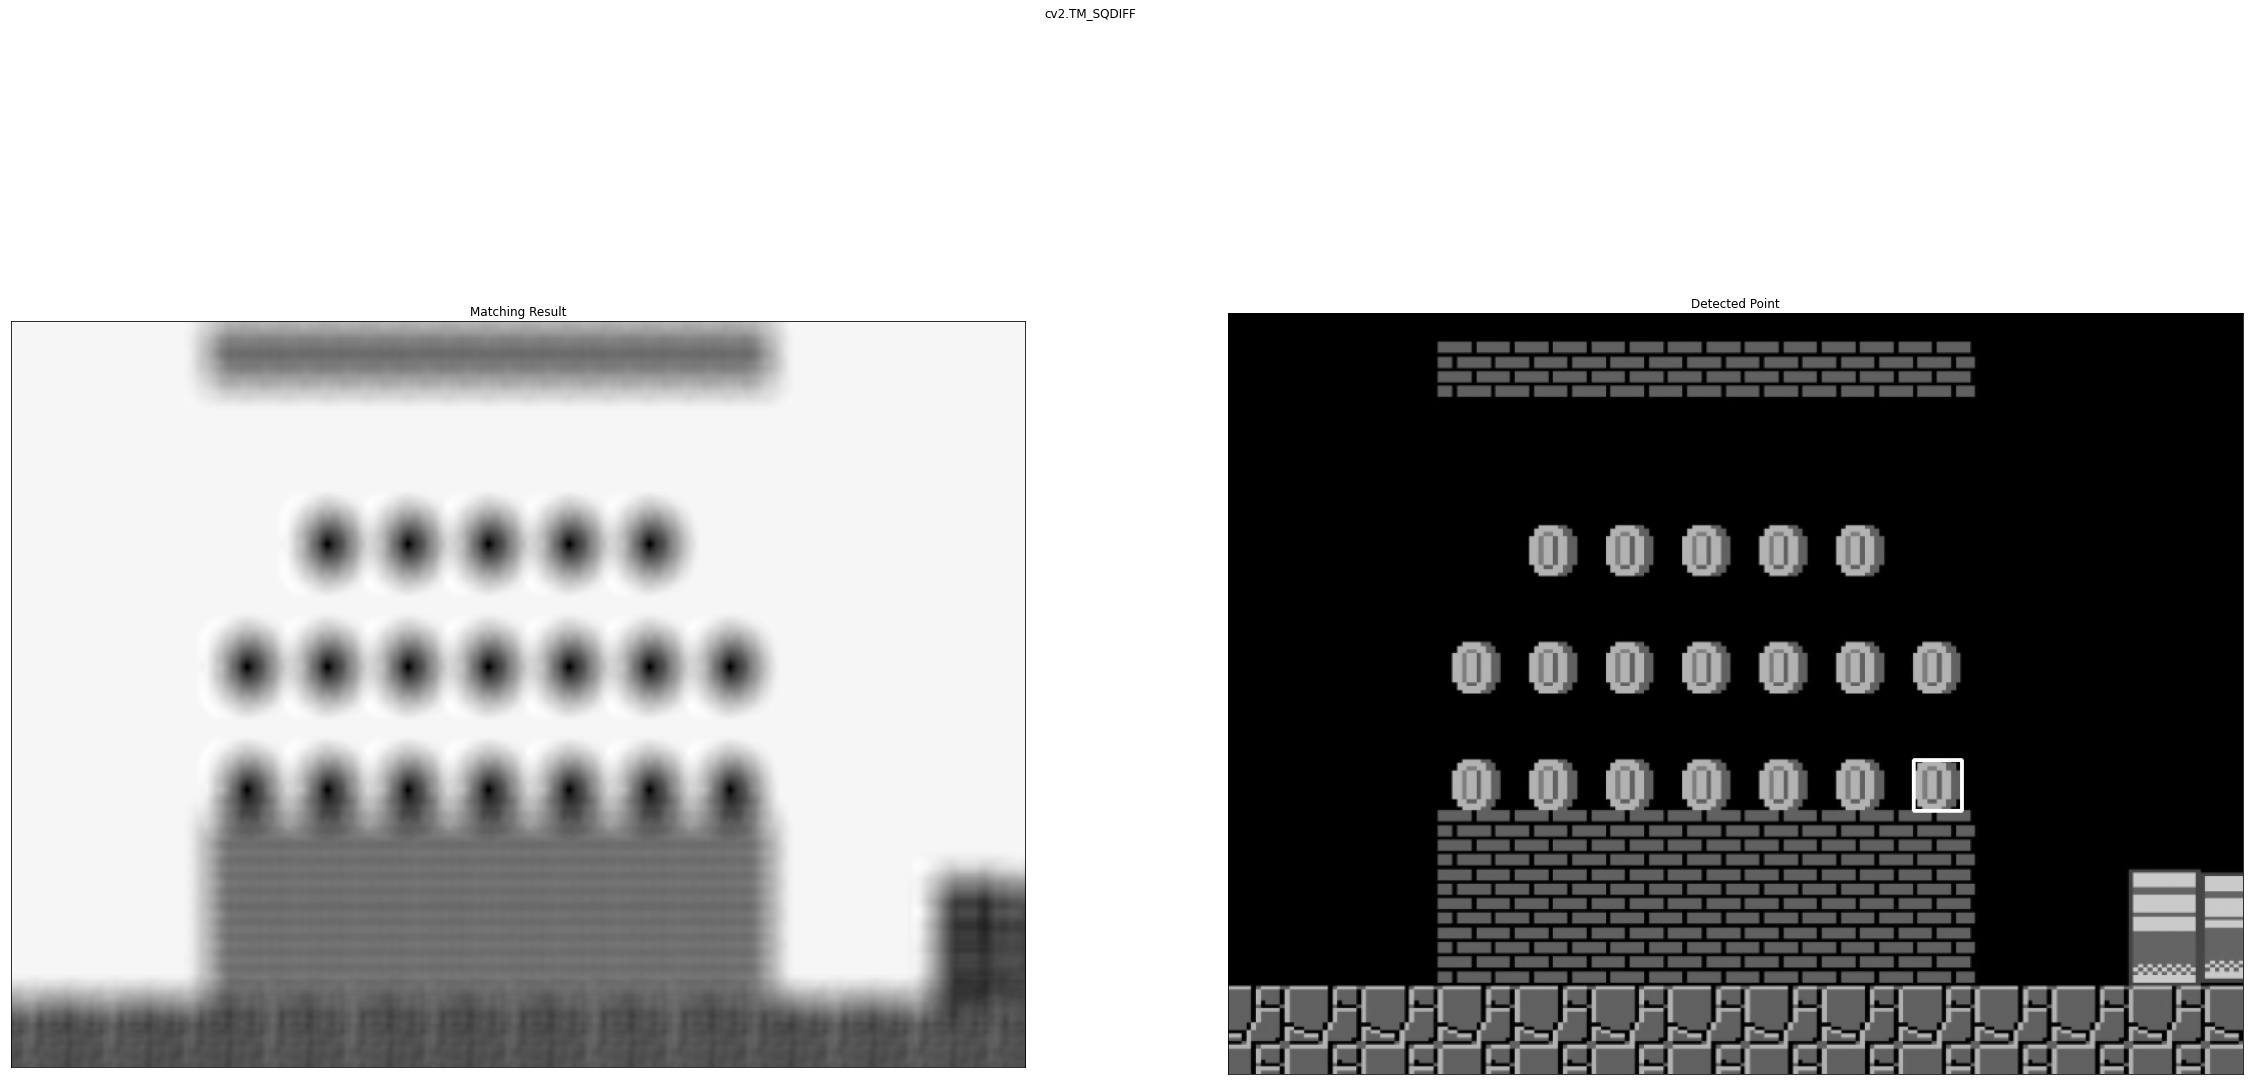

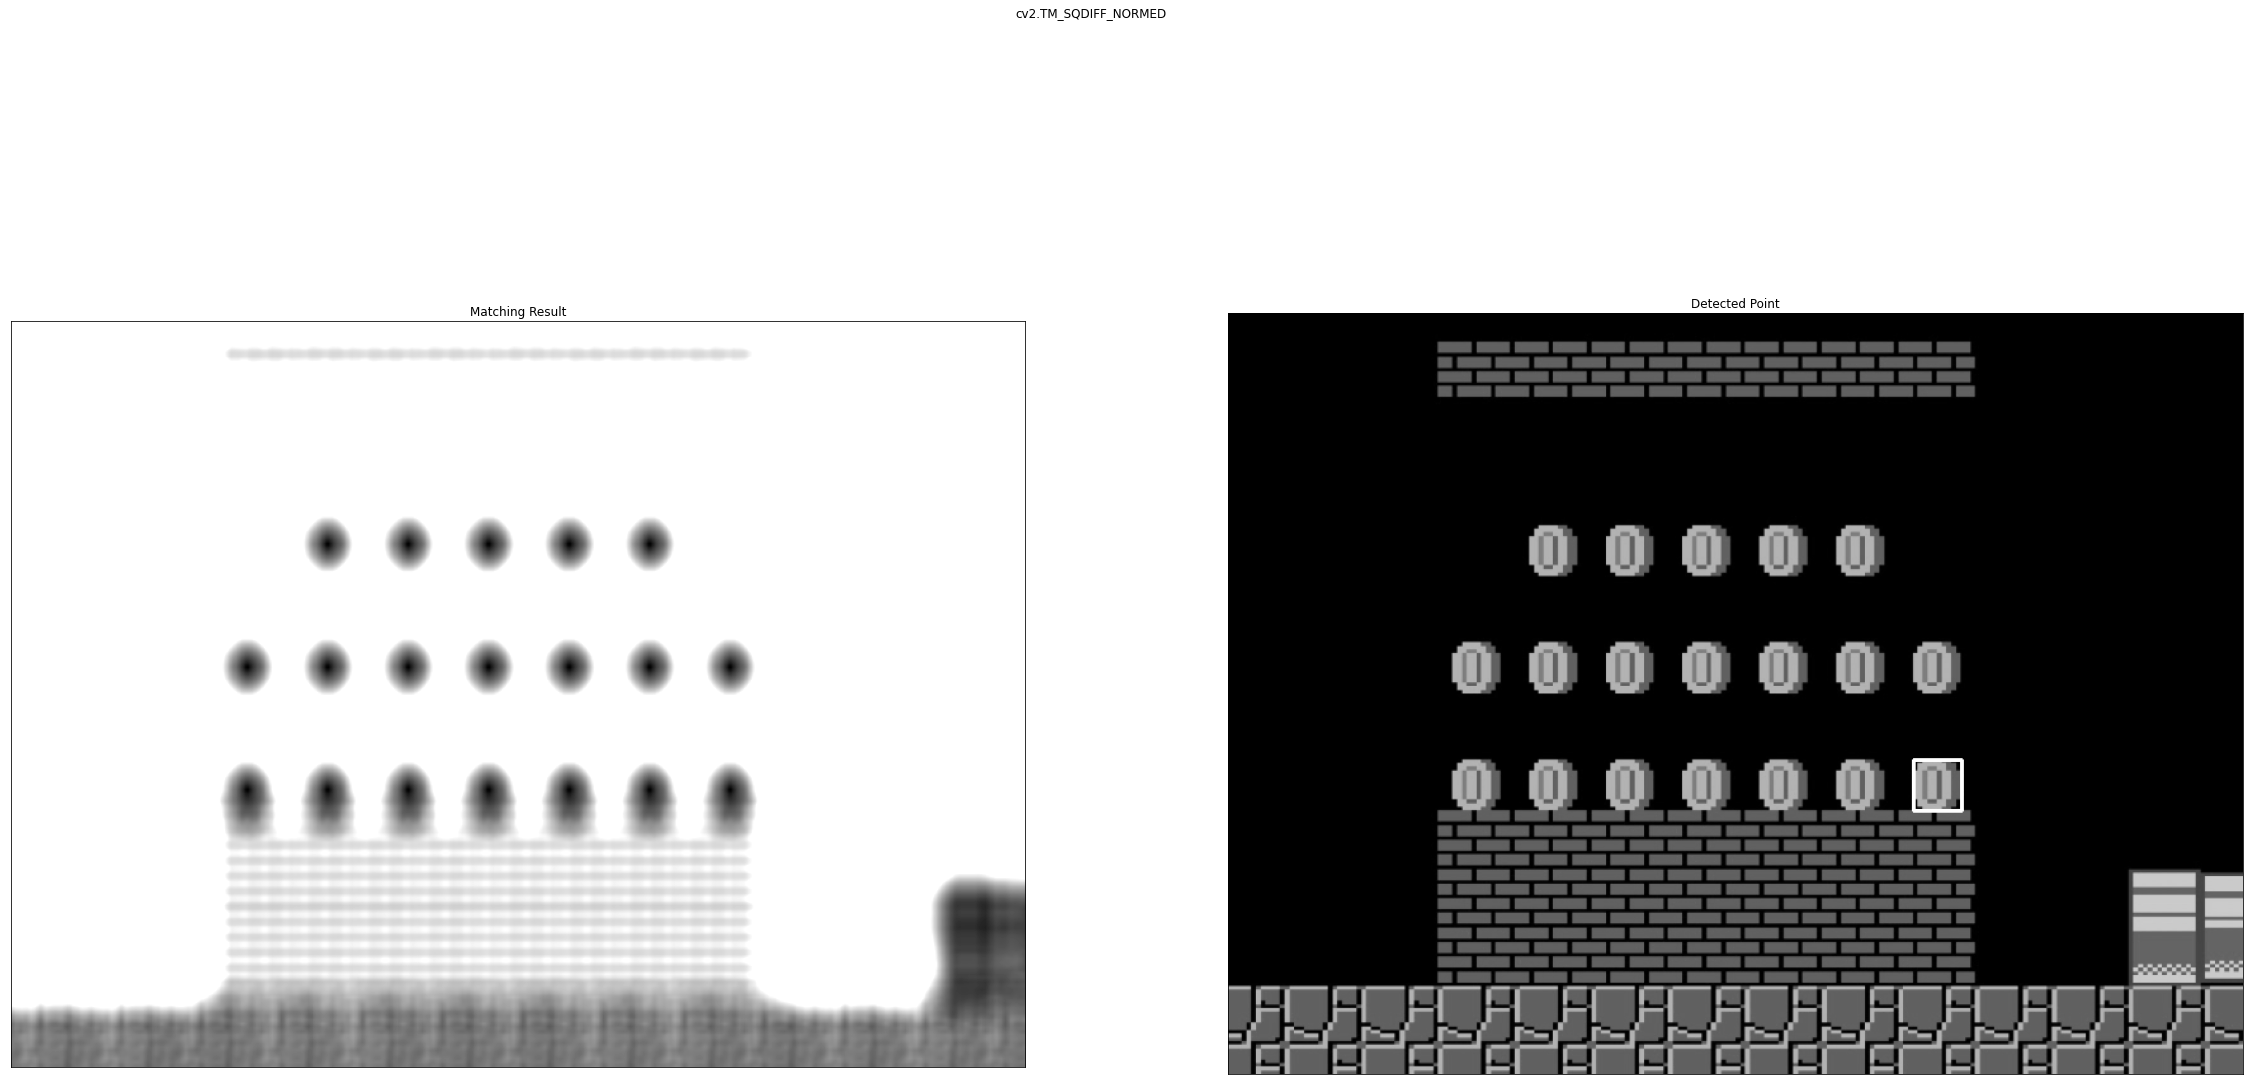

In [147]:
import cv2
import numpy as np

img = cv2.imread('images/ma.png',0)
img2 = img.copy()
template = cv2.imread('images/coin.png',0)
w, h = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
